In [5]:
#using Pkg
#Pkg.activate("D:\\Science\\Code\\Julia\\envr")
using StaticArrays, DifferentialEquations, DynamicalSystems, JLD, CairoMakie

In [18]:
@inbounds U(y, p) = p[8] + p[9] / ( 1.0 + exp( -50.0 * (y - p[7]) ) )
@inbounds σ(x, p) = 1.0 / ( 1.0 + exp( -20.0 * (x-p[6]) ) )
@inbounds g(E, x, y, p, U_) = log( 1.0 + exp( (p[5] * U_ * x * E + p[11]  ) / (p[1]) ) )

@inbounds function TM(u, p, t)
    
    U_ = U(u[3], p)
    
    du1 = (-u[1] + p[1] * g(u[1], u[2], u[3], p, U_) ) / p[2]
    du2 = (1.0 - u[2]) / p[3] - U_*u[2]*u[1]
    du3 = (-u[3])/p[4] + p[10] * σ(u[2], p)
    
    return SVector(du1, du2, du3)
end

TM (generic function with 1 method)

In [19]:
t = 500; tstep = 0.001
trange = range(0.0, t, step = tstep)
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [20]:
const τ = 0.013;  const τD = 0.080;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58;  const ΔU0 = 0.305;

In [21]:
I0range = range( -0.5, -2.0,  length = 200 )
U0range = range( 0.22,  0.55, length = 200 )

0.22:0.0016582914572864321:0.55

In [22]:
path = "C:\\Users\\Alex\\Desktop\\repo\\2612\\0903\\dynamical-systems\\Tsodyks Markram\\Levanova\\3 набор параметров\\Сопоставление с матконт\\";
filenameLS = "LSs_200_200_time_1000.jld"
filenameu0s = "u0s_200_200_time_1000.jld"
pathLS = path*filenameLS
pathu0s = path*filenameu0s;

In [23]:
Λs = load(pathLS)["data"]
u0s = load(pathu0s)["data"];

In [24]:
modes = zeros(200, 200);
filename = "Map_mode_200x200.jld"

"Map_mode_200x200.jld"

In [26]:
"""
-1 -- fixed point
1 -- spike mode
2 -- burst mode
3 -- chaos mode
"""

"-1 -- fixed point\n1 -- spike mode\n2 -- burst mode\n3 -- chaos mode\n"

In [27]:
function check_chaos_mode(idx_I0, idx_U0)
    chaos = 0
    if Λs[idx_I0, idx_U0, 1] >= 0.1
            chaos = 3
    end
    return chaos
end
function check_fp(idx_I0, idx_U0)
    fp = 0
    if Λs[idx_I0, idx_U0, 1] <= -0.1
            fp = -1
    end 
end
function local_min(tr)
    
    localmin = Float64[]
    placeintime = Float64[]
    
    for idx in range(2, length(tr) - 1, step = 1)
        if tr[idx-1] > tr[idx] < tr[idx+1]
            push!(localmin, tr[idx])
            push!(placeintime, trange[idx])
        end
    end
    return localmin, placeintime
end
function traj(idx_I0, idx_U0)
    
    E, x, y = u0s[idx_I0, idx_U0, :]
    u0 =  [E, x, y]
    I0_ = I0range[idx_I0]
    U0_ = U0range[idx_U0]
    p =  [α, τ, τD, τy, J, xthr, ythr, U0_, ΔU0, β, I0_]
    ds = CoupledODEs(TM, u0, p, diffeq = integ_set)
    tr, _ = trajectory(ds, t)
    
    return tr[:, 1]
end
function detect_mode(idx_I0, idx_U0)
    
    mode = check_chaos_mode(idx_I0, idx_U0)
    if mode == 0
        fp = check_fp(idx_I0, idx_U0)
        if fp == -1
            return fp
        end
        tr = traj(idx_I0, idx_U0)
        lcmin, _ = local_min(tr)
        if abs(maximum(lcmin) - minimum(lcmin)) > 0.4 # Было 2 !
            mode = 2
            println();flush(stdout)
            println(abs(maximum(lcmin) - minimum(lcmin)));flush(stdout)
        else
            mode = 1
        end
    end
    return mode
end
function save_tofile(modes)
    save(filename, "data", modes)
end

save_tofile (generic function with 1 method)

In [28]:
function output(idx_U0, U0, idx_I0, I0, mode)
    println("index U0: $idx_U0; index I0: $idx_I0");flush(stdout)
    println("U0: $U0");flush(stdout)
    println("I0: $I0");flush(stdout)
    println("Mode: $mode");flush(stdout)
end
function separate()
    println("");flush(stdout)
    println("----------------");flush(stdout)
end

separate (generic function with 1 method)

In [ ]:
for (idx_U0, U0) in enumerate(U0range)
    for (idx_I0, I0) in enumerate(I0range)
        
        modes[idx_I0,idx_U0] =  detect_mode(idx_I0, idx_U0)
        output(idx_U0, U0, idx_I0, I0, modes[idx_I0,idx_U0])
        separate()
        
    end
    save_tofile(modes)
end   

index U0: 1; index I0: 1
U0: 0.22
I0: -0.5
Mode: -1.0

----------------
index U0: 1; index I0: 2
U0: 0.22
I0: -0.507537688442211
Mode: -1.0

----------------
index U0: 1; index I0: 3
U0: 0.22
I0: -0.5150753768844221
Mode: -1.0

----------------
index U0: 1; index I0: 4
U0: 0.22
I0: -0.5226130653266332
Mode: -1.0

----------------
index U0: 1; index I0: 5
U0: 0.22
I0: -0.5301507537688442
Mode: -1.0

----------------
index U0: 1; index I0: 6
U0: 0.22
I0: -0.5376884422110553
Mode: -1.0

----------------
index U0: 1; index I0: 7
U0: 0.22
I0: -0.5452261306532663
Mode: -1.0

----------------
index U0: 1; index I0: 8
U0: 0.22
I0: -0.5527638190954773
Mode: -1.0

----------------
index U0: 1; index I0: 9
U0: 0.22
I0: -0.5603015075376885
Mode: -1.0

----------------
index U0: 1; index I0: 10
U0: 0.22
I0: -0.5678391959798995
Mode: -1.0

----------------
index U0: 1; index I0: 11
U0: 0.22
I0: -0.5753768844221105
Mode: -1.0

----------------
index U0: 1; index I0: 12
U0: 0.22
I0: -0.582914572864321

Mode: -1.0

----------------
index U0: 1; index I0: 95
U0: 0.22
I0: -1.2085427135678393
Mode: -1.0

----------------
index U0: 1; index I0: 96
U0: 0.22
I0: -1.2160804020100502
Mode: -1.0

----------------
index U0: 1; index I0: 97
U0: 0.22
I0: -1.2236180904522613
Mode: -1.0

----------------
index U0: 1; index I0: 98
U0: 0.22
I0: -1.2311557788944723
Mode: -1.0

----------------
index U0: 1; index I0: 99
U0: 0.22
I0: -1.2386934673366834
Mode: -1.0

----------------
index U0: 1; index I0: 100
U0: 0.22
I0: -1.2462311557788945
Mode: -1.0

----------------
index U0: 1; index I0: 101
U0: 0.22
I0: -1.2537688442211055
Mode: -1.0

----------------
index U0: 1; index I0: 102
U0: 0.22
I0: -1.2613065326633166
Mode: -1.0

----------------
index U0: 1; index I0: 103
U0: 0.22
I0: -1.2688442211055277
Mode: -1.0

----------------
index U0: 1; index I0: 104
U0: 0.22
I0: -1.2763819095477387
Mode: -1.0

----------------
index U0: 1; index I0: 105
U0: 0.22
I0: -1.2839195979899498
Mode: -1.0

--------------

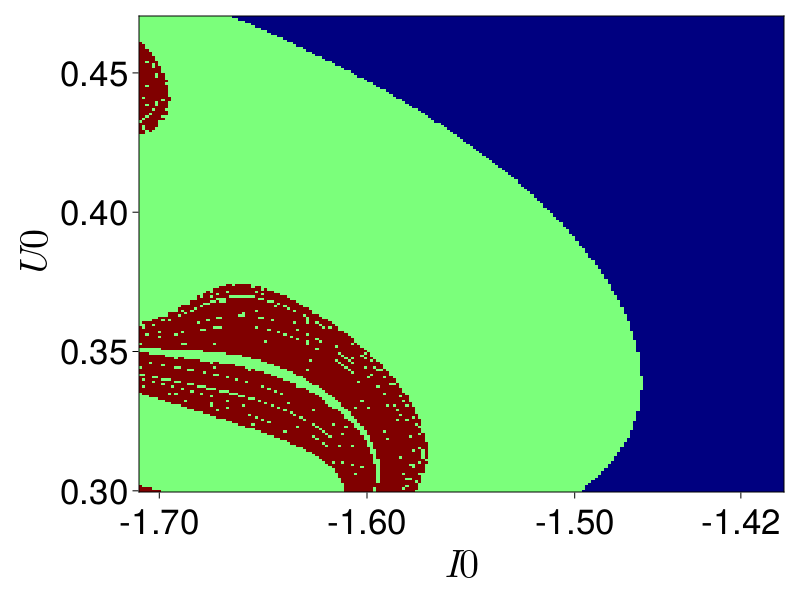

In [98]:
f = Figure(resolution = (800, 600))
ax1 = Axis(f[1, 1], xlabel = L"I0",ylabel = L"U0", xlabelsize = 40, ylabelsize = 40,
            xticklabelsize = 35, yticklabelsize = 35)

heatmap!(ax1, I0range, U0range, modes,
                colormap = :jet1)
#Colorbar(f[1, 2], hm, ticklabelsize = 35)
f